# Retail Sales Performance EDA

## Objective
Analyze retail sales data using Python to identify revenue concentration,
discount impact on profitability, and regional performance issues.

## Key Insights
- Technology contributes ~96% of total revenue, indicating concentration risk
- Higher discounts in Furniture are associated with negative profit
- Central and South regions underperform on profit margins
- Discounts are a key driver of margin erosion

## Recommendations
- Tighten discount controls for Furniture category
- Protect margins in Technology (core revenue driver)
- Shift focus from revenue-only to margin-focused KPIs
- Review pricing and promotions in Central and South regions


## Data Loading & Understanding


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("../data/sales.csv")
df.head()


,order_id,order_date,ship_date,customer_id,region,state,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2019-100006,2019-09-08,2019-09-13,CG-12520,West,California,Furniture,Chairs,Office Chair,261.96,2,0.0,41.91
1,CA-2019-100090,2019-07-19,2019-07-24,EB-13870,East,New York,Technology,Phones,iPhone,731.94,3,0.0,219.58
2,CA-2019-100293,2019-03-14,2019-03-19,KM-16375,Central,Texas,Office Supplies,Binders,Heavy Duty Binder,14.62,2,0.2,-6.87
3,CA-2019-100328,2019-01-28,2019-02-03,SM-20320,South,Florida,Technology,Accessories,Wireless Mouse,957.58,5,0.2,167.58
4,CA-2019-100363,2019-04-01,2019-04-06,AG-10270,West,Washington,Office Supplies,Paper,Printer Paper,22.37,3,0.0,10.74


In [6]:
df.shape

(10, 13)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      10 non-null     object 
 1   order_date    10 non-null     object 
 2   ship_date     10 non-null     object 
 3   customer_id   10 non-null     object 
 4   region        10 non-null     object 
 5   state         10 non-null     object 
 6   category      10 non-null     object 
 7   sub_category  10 non-null     object 
 8   product_name  10 non-null     object 
 9   sales         10 non-null     float64
 10  quantity      10 non-null     int64  
 11  discount      10 non-null     float64
 12  profit        10 non-null     float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ KB


In [8]:
df.describe()

,sales,quantity,discount,profit
count,10.000000,10.000000,10.00000,10.000000
mean,380.886000,3.500000,0.10000,20.309000
std,418.161996,1.581139,0.11547,162.448214
min,14.620000,2.000000,0.00000,-383.030000
25%,38.795000,2.250000,0.00000,-1.305000
50%,158.720000,3.000000,0.05000,15.650000
75%,707.950000,4.000000,0.20000,105.877500
max,1044.630000,7.000000,0.30000,219.580000


In [12]:
df.isna().sum()


order_id        0
order_date      0
ship_date       0
customer_id     0
region          0
state           0
category        0
sub_category    0
product_name    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [13]:
df.duplicated().sum()


0

## Data Cleaning


In [14]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      10 non-null     object        
 1   order_date    10 non-null     datetime64[ns]
 2   ship_date     10 non-null     datetime64[ns]
 3   customer_id   10 non-null     object        
 4   region        10 non-null     object        
 5   state         10 non-null     object        
 6   category      10 non-null     object        
 7   sub_category  10 non-null     object        
 8   product_name  10 non-null     object        
 9   sales         10 non-null     float64       
 10  quantity      10 non-null     int64         
 11  discount      10 non-null     float64       
 12  profit        10 non-null     float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 1.1+ KB


In [19]:
df[df["profit"] < 0]


,order_id,order_date,ship_date,customer_id,region,state,category,sub_category,product_name,sales,quantity,discount,profit
2,CA-2019-100293,2019-03-14,2019-03-19,KM-16375,Central,Texas,Office Supplies,Binders,Heavy Duty Binder,14.62,2,0.2,-6.87
5,CA-2019-100706,2019-09-20,2019-09-25,LC-16885,Central,Illinois,Furniture,Tables,Conference Table,1044.63,3,0.3,-383.03
9,CA-2020-101308,2020-06-21,2020-06-26,DK-13090,Central,Ohio,Office Supplies,Art,Sketch Pens,35.44,4,0.2,-5.32


In [22]:
df['discount'].describe()

count    10.00000
mean      0.10000
std       0.11547
min       0.00000
25%       0.00000
50%       0.05000
75%       0.20000
max       0.30000
Name: discount, dtype: float64

## Discount vs Profit Analysis


In [25]:
df.groupby("category")[["sales", "profit", "discount"]].mean().reset_index()


,category,sales,profit,discount
0,Furniture,451.816667,-108.820000,0.1
1,Office Supplies,31.977500,3.797500,0.1
2,Technology,775.166667,171.453333,0.1


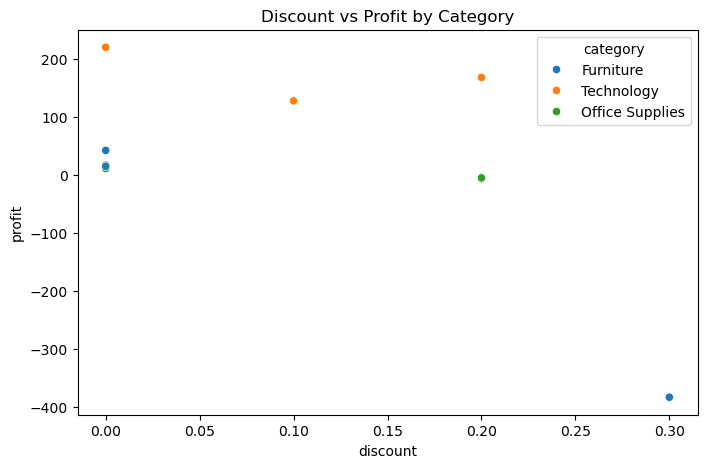

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="discount", y="profit", hue="category")
plt.title("Discount vs Profit by Category")
plt.show()


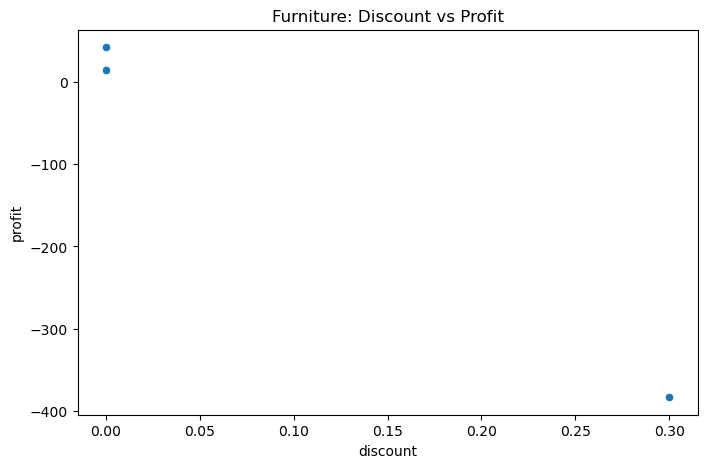

In [27]:
furniture_df = df[df["category"] == "Furniture"]

plt.figure(figsize=(8,5))
sns.scatterplot(data=furniture_df, x="discount", y="profit")
plt.title("Furniture: Discount vs Profit")
plt.show()


## Category Performance


In [28]:
category_sales = (
    df.groupby("category")["sales"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

category_sales


,category,sales
0,Technology,2325.50
1,Furniture,1355.45
2,Office Supplies,127.91


In [29]:
category_sales["sales_pct"] = (
    category_sales["sales"] / category_sales["sales"].sum() * 100
)

category_sales


,category,sales,sales_pct
0,Technology,2325.50,61.055014
1,Furniture,1355.45,35.586763
2,Office Supplies,127.91,3.358223


In [30]:
category_sales["cumulative_pct"] = category_sales["sales_pct"].cumsum()

category_sales


,category,sales,sales_pct,cumulative_pct
0,Technology,2325.50,61.055014,61.055014
1,Furniture,1355.45,35.586763,96.641777
2,Office Supplies,127.91,3.358223,100.000000


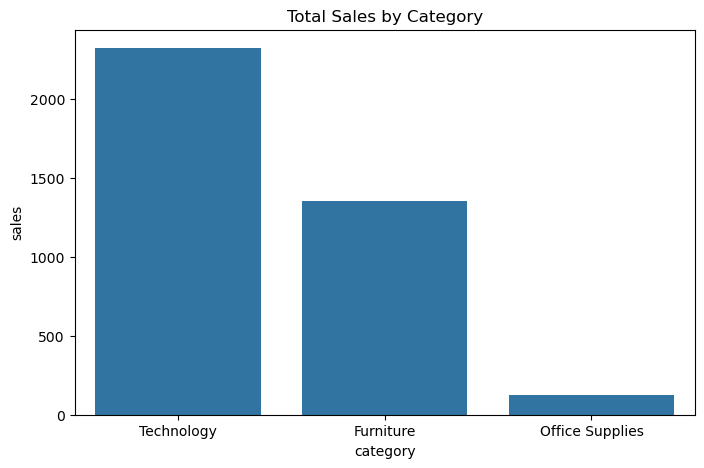

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x="category", y="sales")
plt.title("Total Sales by Category")
plt.show()


## Regional Performance


In [38]:
region_perf = (df.groupby("region") [["sales","profit"]].sum().reset_index())
region_perf

,region,sales,profit
0,Central,1094.69,-395.22
1,East,787.42,236.22
2,South,1593.56,294.78
3,West,333.19,67.31


In [39]:
region_perf["profit_margin_pct"] = (
    region_perf["profit"] / region_perf["sales"] * 100
)

region_perf


,region,sales,profit,profit_margin_pct
0,Central,1094.69,-395.22,-36.103372
1,East,787.42,236.22,29.999238
2,South,1593.56,294.78,18.498205
3,West,333.19,67.31,20.201687


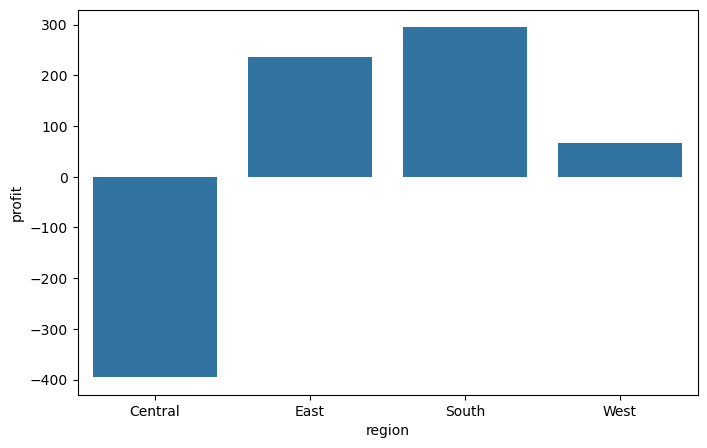

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(data= region_perf, x = "region",y = "profit")
plt.title = ("Profit by Region")
plt.show()

In [43]:
df["order_month"] = df["order_date"].dt.to_period("M")


In [44]:
monthly_perf = (
    df.groupby("order_month")[["sales", "profit"]]
      .sum()
      .reset_index()
)

monthly_perf


,order_month,sales,profit
0,2019-01,957.58,167.58
1,2019-03,14.62,-6.87
2,2019-04,22.37,10.74
3,2019-07,731.94,219.58
4,2019-09,1306.59,-341.12
5,2019-11,55.48,16.64
6,2019-12,635.98,127.20
7,2020-02,48.86,14.66
8,2020-06,35.44,-5.32
